# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach to analyzing and visualizing datasets to summarize their main characteristics. The goal is to uncover patterns, relationships, anomalies, and trends that can guide further analysis or decision-making.

Types of Exploratory Data Analysis

-- There are three main types of EDA:

* Univariate Analysis: Examines one variable at a time.
* Bivariate Analysis: Analyzes the relationship between two variables.
* Multivariate Analysis: Explores relationships among three or more variables.

## **Step 1: Understand the Data**

* Familiarize yourself with the dataset, including the number of records, columns, and data types.
* Identify the target variable (if applicable) and understand its significance.

### Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("product_data.csv")

## 1. Data Size:

Question: How large is the data?

Approach: Check the shape of the dataset.

-- `shape` returns the number of rows and columns.

In [3]:
data.shape

(60, 10)

## 2. Data Preview:

Question: What does the data look like?

Approach: Look at the first few rows of the dataset using head() or sample().

-- `head()` displays the first few rows of the dataset.

-- `sample()` displays the randomly selected items rows of the dataset.

In [4]:
data.head()

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
0,1,Smartphone X,Electronics,500.0,4.2,Discount,Young,2,4,2/15/2022
1,2,Fashion Jacket,Clothing,80.0,4.5,Bundle Offer,Adult,3,5,8/20/2021
2,3,Kitchen Blender,Home & Kitchen,120.0,3.8,NaN,Senior,4,3,5/10/2022
3,4,Running Shoes,Sports,60.0,4.0,Discount,Young,2,4,11/3/2022
4,5,LED TV,Electronics,700.0,4.3,NaN,Adult,3,4,6/27/2021


In [5]:
data.sample(5)

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
48,219,Lunch Box,Kitchen,15.0,3.9,NaN,Young,2,2,4/5/2022
12,13,Blow Dryer,Beauty,50.0,3.7,NaN,Senior,4,2,4/2/2022
37,208,Outdoor Tent,Outdoor & Recreation,100.0,4.4,Discount,Adult,3,5,3/22/2023
40,211,Fitness Tracker,Health & Wellness,35.0,4.0,NaN,Adult,3,4,8/7/2022
39,210,Air Fryer,Home & Kitchen,75.0,4.6,NaN,Young,2,5,1/30/2022


## 3. Data Types:

Question: What types of information are stored in each column?

Approach: Check the data types of each column using dtypes or info().

-- `info()` provides information about the dataset, including memory usage.

-- `dtypes` returns the data types of each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             60 non-null     int64  
 1   ProductName           60 non-null     object 
 2   Category              60 non-null     object 
 3   Price                 59 non-null     float64
 4   CustomerRating        60 non-null     float64
 5   PromotionType         25 non-null     object 
 6   CustomerAge           59 non-null     object 
 7   ShippingTime          60 non-null     int64  
 8   CustomerSatisfaction  60 non-null     int64  
 9   ShippingDate          60 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.8+ KB


In [7]:
data.dtypes

ProductID                 int64
ProductName              object
Category                 object
Price                   float64
CustomerRating          float64
PromotionType            object
CustomerAge              object
ShippingTime              int64
CustomerSatisfaction      int64
ShippingDate             object
dtype: object

## 4. Summary Statistics:

Question: What are the central tendencies and spread?

Approach: Obtain statistical measures using describe().

-- `describe()` gives statistical measures for numerical columns

-- `describe().transpose()`

In [8]:
data.describe()

,ProductID,Price,CustomerRating,ShippingTime,CustomerSatisfaction
count,60.000000,59.000000,60.000000,60.000000,60.000000
mean,115.500000,70.220339,4.106667,2.966667,3.600000
std,101.220936,111.686456,0.277926,0.822701,0.994902
min,1.000000,8.000000,3.500000,2.000000,2.000000
25%,15.750000,25.000000,3.900000,2.000000,3.000000
50%,115.500000,40.000000,4.100000,3.000000,4.000000
75%,215.250000,70.000000,4.300000,4.000000,4.000000
max,230.000000,700.000000,4.600000,4.000000,5.000000


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductID,60.0,115.500000,101.220936,1.0,15.75,115.5,215.25,230.0
Price,59.0,70.220339,111.686456,8.0,25.00,40.0,70.00,700.0
CustomerRating,60.0,4.106667,0.277926,3.5,3.90,4.1,4.30,4.6
ShippingTime,60.0,2.966667,0.822701,2.0,2.00,3.0,4.00,4.0
CustomerSatisfaction,60.0,3.600000,0.994902,2.0,3.00,4.0,4.00,5.0


-- `Central Tendency`: This term refers to values located at the data's central position or middle zone. 

The three generally estimated parameters of central tendency are mean, median, and mode. 

-- Mean is the average of all values in data.

-- While the mode is the value that occurs the maximum number of times. 

-- The Median is the middle value with equal observations to its left and right. 

In [10]:
data["CustomerSatisfaction"].skew() #becuase mean is less than median, left skewed.

-0.28629649843102617

In [11]:
data['CustomerRating'].skew()

-0.061389701545685425

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CustomerSatisfaction', ylabel='Density'>

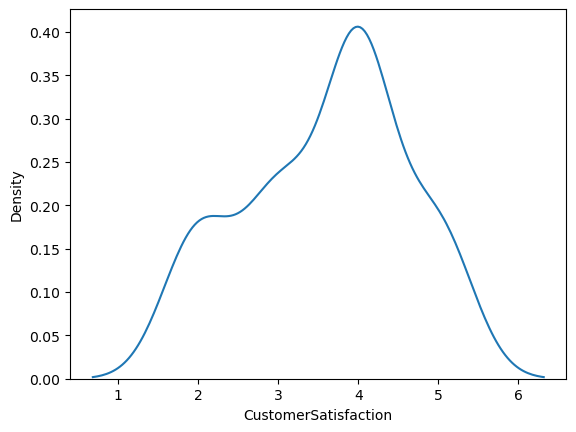

In [12]:
sns.kdeplot(data["CustomerSatisfaction"])

In [13]:
data["Price"].skew()

4.338348926133198

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

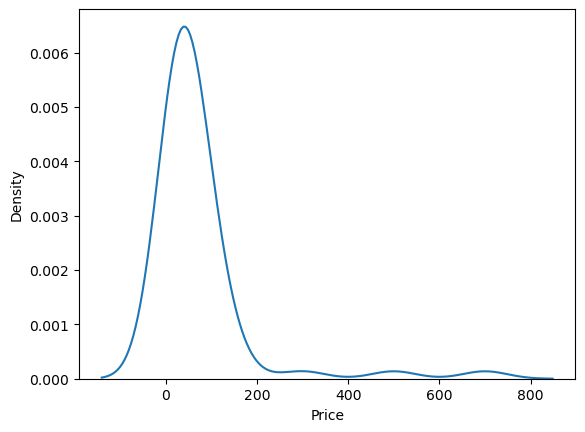

In [14]:
sns.kdeplot(data["Price"]) #This price data is right skewed.

## 5. Missing Values:

Question: Are there any null or missing values in the data?

Approach: Check for the presence of missing values using isnull() or isna().


-- `isnull().sum()` or `isna().sum()` gives the total number of missing values per column.

-- `isnull().mean() * 100` provides the percentage of missing values.

In [15]:
data.isna().sum()

ProductID                0
ProductName              0
Category                 0
Price                    1
CustomerRating           0
PromotionType           35
CustomerAge              1
ShippingTime             0
CustomerSatisfaction     0
ShippingDate             0
dtype: int64

In [16]:
data.isnull().mean() * 100

ProductID                0.000000
ProductName              0.000000
Category                 0.000000
Price                    1.666667
CustomerRating           0.000000
PromotionType           58.333333
CustomerAge              1.666667
ShippingTime             0.000000
CustomerSatisfaction     0.000000
ShippingDate             0.000000
dtype: float64

In [17]:
#Drop all rows with any missing values
data1= data.dropna()
data1.isna().sum()

ProductID               0
ProductName             0
Category                0
Price                   0
CustomerRating          0
PromotionType           0
CustomerAge             0
ShippingTime            0
CustomerSatisfaction    0
ShippingDate            0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             60 non-null     int64  
 1   ProductName           60 non-null     object 
 2   Category              60 non-null     object 
 3   Price                 59 non-null     float64
 4   CustomerRating        60 non-null     float64
 5   PromotionType         25 non-null     object 
 6   CustomerAge           59 non-null     object 
 7   ShippingTime          60 non-null     int64  
 8   CustomerSatisfaction  60 non-null     int64  
 9   ShippingDate          60 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.8+ KB


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             24 non-null     int64  
 1   ProductName           24 non-null     object 
 2   Category              24 non-null     object 
 3   Price                 24 non-null     float64
 4   CustomerRating        24 non-null     float64
 5   PromotionType         24 non-null     object 
 6   CustomerAge           24 non-null     object 
 7   ShippingTime          24 non-null     int64  
 8   CustomerSatisfaction  24 non-null     int64  
 9   ShippingDate          24 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ KB


### Missing value imputation
-- .fillna({'column name': data['column name'].mean()})

-- .fillna({'column name': data['column name'].median()})

-- .fillna({'column name': data['column name'].mode()[0]})

-- .fillna({'column name': 'constant'})

In [20]:
data['Price'].mode()

0    15.0
1    25.0
Name: Price, dtype: float64

In [21]:
# impute the missing values using fillna
# numerical data you can use mean/median/mode/constant
# categorical data you can use mode/constant
data =  data.fillna({'Price': data['Price'].mode()[1]})

In [22]:
data.isna().sum()

ProductID                0
ProductName              0
Category                 0
Price                    0
CustomerRating           0
PromotionType           35
CustomerAge              1
ShippingTime             0
CustomerSatisfaction     0
ShippingDate             0
dtype: int64

In [23]:
data['PromotionType'].unique()

array(['Discount', 'Bundle Offer', nan], dtype=object)

In [24]:
data = data.fillna({'PromotionType':'No_Promotion'})

In [25]:
data.isna().sum()

ProductID               0
ProductName             0
Category                0
Price                   0
CustomerRating          0
PromotionType           0
CustomerAge             1
ShippingTime            0
CustomerSatisfaction    0
ShippingDate            0
dtype: int64

In [26]:
data['PromotionType'].unique()

array(['Discount', 'Bundle Offer', 'No_Promotion'], dtype=object)

In [27]:
#data['CustomerAge'] = data['CustomerAge'].astype('int64') #this is a categorical data

In [28]:
data = data.fillna({'CustomerAge': data['CustomerAge'].mode()[0]})

In [29]:
data.isna().sum()

ProductID               0
ProductName             0
Category                0
Price                   0
CustomerRating          0
PromotionType           0
CustomerAge             0
ShippingTime            0
CustomerSatisfaction    0
ShippingDate            0
dtype: int64

## 6. Duplicate Data:

Question: Are there duplicate values?

Approach: Identify and remove duplicates using duplicated().

-- `duplicated().sum()` counts the number of duplicate rows.

-- `drop_duplicates()` removes duplicate rows.

In [30]:
print("Total duplicate values are '", data.duplicated().sum(), "'.")

Total duplicate values are ' 0 '.


## 7. Correlation Analysis:

Question: How are different columns related to each other?

Approach: Examine the correlation matrix and visualize it if needed.

-- `corr()` calculates the correlation matrix.

-- `heatmap()` visualizes the correlation matrix.

In [31]:
data_num = data.select_dtypes('number') #this takes every number on the dataset
data_num.head()

,ProductID,Price,CustomerRating,ShippingTime,CustomerSatisfaction
0,1,500.0,4.2,2,4
1,2,80.0,4.5,3,5
2,3,120.0,3.8,4,3
3,4,60.0,4.0,2,4
4,5,700.0,4.3,3,4


In [32]:
data_num.sum()

ProductID               6930.0
Price                   4168.0
CustomerRating           246.4
ShippingTime             178.0
CustomerSatisfaction     216.0
dtype: float64

In [33]:
data_num.corr()

,ProductID,Price,CustomerRating,ShippingTime,CustomerSatisfaction
ProductID,1.000000,-0.289591,-0.039644,0.047830,-0.213747
Price,-0.289591,1.000000,0.235388,-0.040885,0.265350
CustomerRating,-0.039644,0.235388,1.000000,-0.065726,0.818926
ShippingTime,0.047830,-0.040885,-0.065726,1.000000,-0.223640
CustomerSatisfaction,-0.213747,0.265350,0.818926,-0.223640,1.000000


In [34]:
#data.heatmap()

## 8. Exploring Diversity:

Question: How many unique values are there in a specific column?
Approach: Use the nunique() method to find the number of unique values in a particular column.

-- `nunique()` method returns the number of unique values for each column.

In [35]:
data["ProductName"].nunique()

# Note: Understand the diversity and variety within a categorical column. Higher unique values may indicate a more diverse range of categories.

60

In [36]:
data["CustomerAge"].nunique()


3

# values_counts()

In [37]:
data['CustomerAge'].value_counts()

CustomerAge
Adult     21
Young     20
Senior    19
Name: count, dtype: int64

# Step 2: Univariate Graphical Analysis
Univariate analysis involves examining the distribution of a single variable. It helps to understand the characteristics of individual variables, such as their central tendency, dispersion, and shape.

In [38]:
data.head()

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
0,1,Smartphone X,Electronics,500.0,4.2,Discount,Young,2,4,2/15/2022
1,2,Fashion Jacket,Clothing,80.0,4.5,Bundle Offer,Adult,3,5,8/20/2021
2,3,Kitchen Blender,Home & Kitchen,120.0,3.8,No_Promotion,Senior,4,3,5/10/2022
3,4,Running Shoes,Sports,60.0,4.0,Discount,Young,2,4,11/3/2022
4,5,LED TV,Electronics,700.0,4.3,No_Promotion,Adult,3,4,6/27/2021


### a. Histograms:

- Purpose: Visualize the frequency distribution of a numerical variable.
- When to Use: When you want to see how values are distributed across intervals.

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Price')

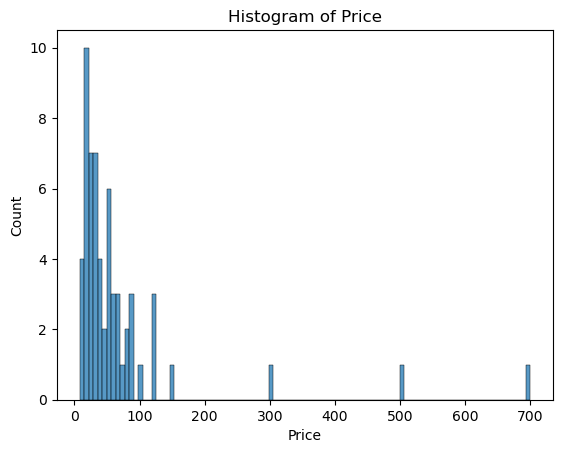

In [39]:
sns.histplot(data["Price"], bins = 100) #otherwise we get all data
plt.title("Histogram of Price")

array([[<Axes: title={'center': 'ProductID'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'CustomerRating'}>,
        <Axes: title={'center': 'ShippingTime'}>],
       [<Axes: title={'center': 'CustomerSatisfaction'}>, <Axes: >]],
      dtype=object)

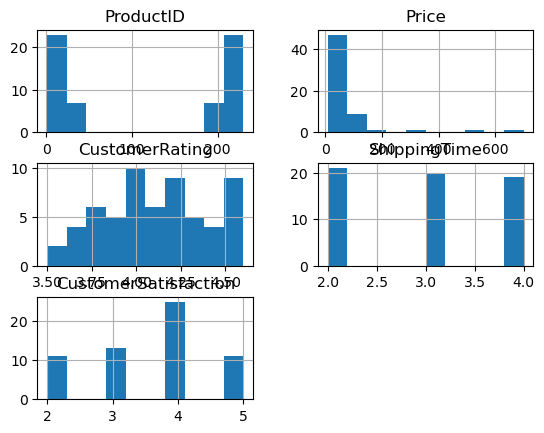

In [40]:
data.hist()

### b. Box Plots:
- Purpose: Display the spread and identify outliers in a dataset.
- When to Use: Ideal for summarizing the central tendency and variability of a variable, especially when comparing across different categories.

Text(0.5, 1.0, 'Boxplot of Customer Rating')

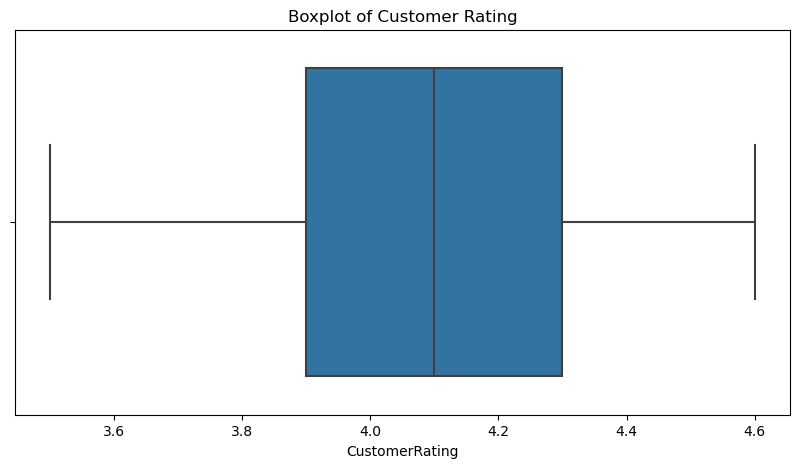

In [41]:
#CustomerRating
plt.figure(figsize = (10,5))
sns.boxplot(x=data['CustomerRating'])
plt.title("Boxplot of Customer Rating")

In [42]:
data["CustomerRating"].describe()

count    60.000000
mean      4.106667
std       0.277926
min       3.500000
25%       3.900000
50%       4.100000
75%       4.300000
max       4.600000
Name: CustomerRating, dtype: float64

### c. Bar Charts:
- Purpose: Show the frequency or proportion of categorical variables.
- When to Use: Use for comparing different categories or showing the distribution of a single categorical variable.

In [43]:
data.sample()

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
16,17,Skin Care Set,Beauty,30.0,3.8,No_Promotion,Young,2,3,5/26/2022


<Axes: xlabel='count', ylabel='Category'>

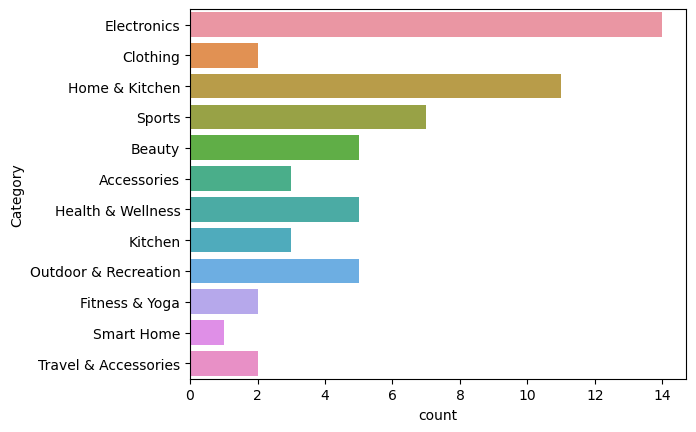

In [44]:
# Bar Chart for the 'Category' column
sns.countplot(y=data['Category'])

### d. Density Plots:
- Purpose: Provide a smoothed, continuous version of the histogram.
- When to Use: When interested in understanding the distribution's shape without the discreteness of a histogram.

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

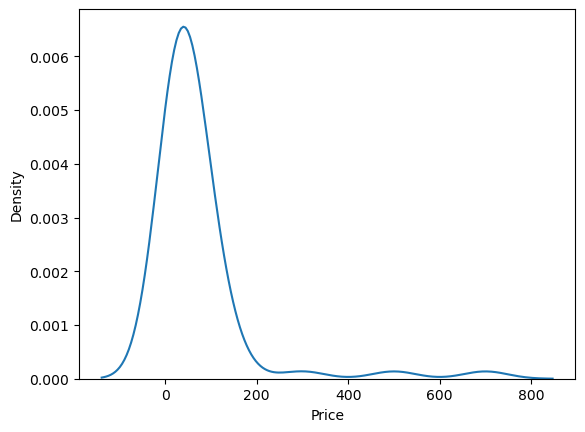

In [45]:
sns.kdeplot(data['Price'])

### e. Pie Charts:
- Purpose: Illustrate the proportions of categories in a whole.
- When to Use: Best for showing relative proportions among categories.

<Axes: ylabel='count'>

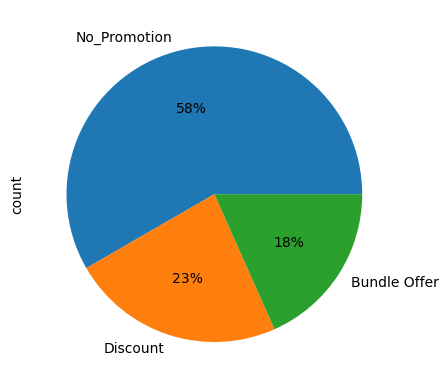

In [46]:
# Pie Chart for the 'PromotionType' column
data['PromotionType'].value_counts().plot.pie(autopct = "%1.0f%%")

##### Q1. Using the Price column in the dataset, generate a histogram. Analyze the distribution of product prices and determine if there are any patterns, such as most prices being within a certain range.

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Price')

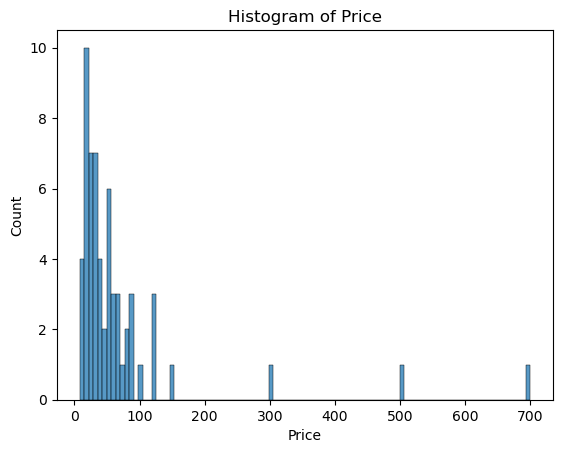

In [58]:
sns.histplot(data["Price"], bins = 100) #otherwise we get all data
plt.title("Histogram of Price")

In [59]:
#The prices are right skewed and are within the range of 10 to 90 and the rest of the values outside of tht range are outliers

##### Q2. Create a box plot for the CustomerRating column. Identify any outliers and discuss what the box plot reveals about the variability in customer ratings.

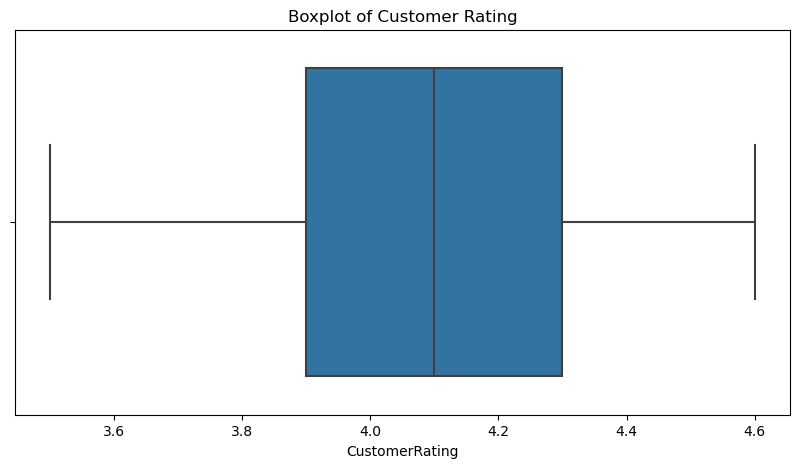

In [61]:
plt.figure(figsize = (10,5))
sns.boxplot(x=data['CustomerRating'])
plt.title("Boxplot of Customer Rating")
plt.show()

# **Step 3: Bi/Multi-variate Graphical Analysis**

Bivariate graphical analysis involves examining the relationship between two variables through visual representation. This type of analysis helps in understanding correlations, dependencies, and potential causality between the variables.

Multivariate Analysis is an extension of bivariate analysis that involves multiple variables simultaneously to find correlations and interactions among them.

### a. Scatter Plot:

- Purpose: Visualize the relationship between two continuous variables.
- When to Use: When exploring potential correlations or trends between two numerical variables.

Text(0.5, 1.0, 'Scatterplot of Price vs. Customer Rating')

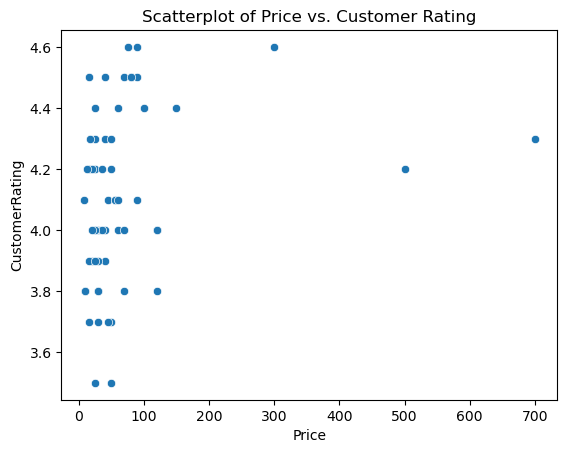

In [47]:
# Scatter Plot: Relationship between 'Price' and 'CustomerRating'
sns.scatterplot(x=data['Price'],y=data['CustomerRating'])
plt.title("Scatterplot of Price vs. Customer Rating")

### b. Line Plot
- Purpose: Visualize the relationship between two continuous variables, especially when one variable represents time or another sequential order.
- When to Use: Use a line plot when you want to examine trends over time or across a sequence, such as how customer satisfaction changes with increasing shipping time.


C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Line plot of shipping Time vs. Customer Satisfaction')

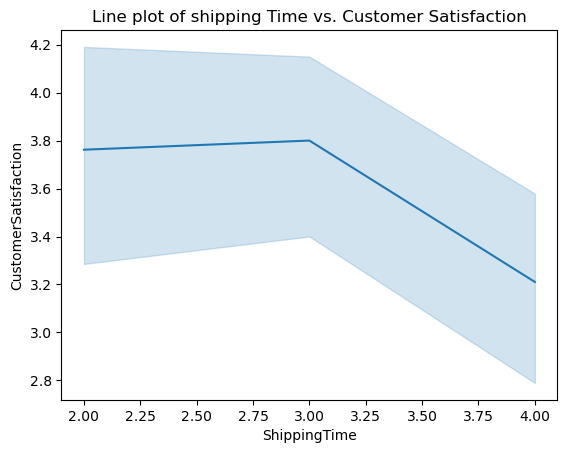

In [48]:
# Line Plot: Relationship between 'ShippingTime' and 'CustomerSatisfaction'
sns.lineplot(x= data["ShippingTime"], y=data['CustomerSatisfaction'])
plt.title("Line plot of shipping Time vs. Customer Satisfaction")

### c. Box Plot
- Purpose: Display the distribution of a continuous variable and highlight its central tendency, variability, and any outliers across different categories of a categorical variable.
- When to Use: Use a box plot when you want to compare the spread and identify potential outliers in the distribution of a continuous variable (like Price) across different categories (like Category). It's particularly useful for understanding the variability within and between different groups.

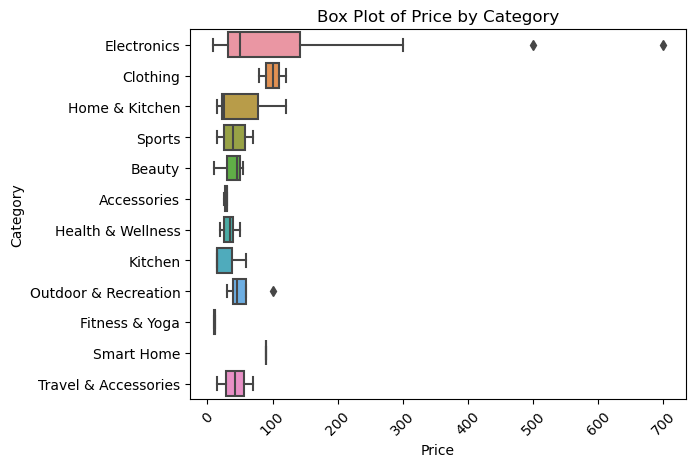

In [49]:
# Box Plot: Distribution of 'Price' by 'Category'
sns.boxplot(y = data['Category'], x = data['Price'])


plt.title('Box Plot of Price by Category')
plt.xticks(rotation=45)
plt.show()

### d. Bar Plot
- Purpose: Compare the central tendency (like mean or median) of a continuous variable across different categories of a categorical variable.
- When to Use: Use a bar plot when you want to compare the average value of a continuous variable (like Price) across different levels of a categorical variable (like Category).

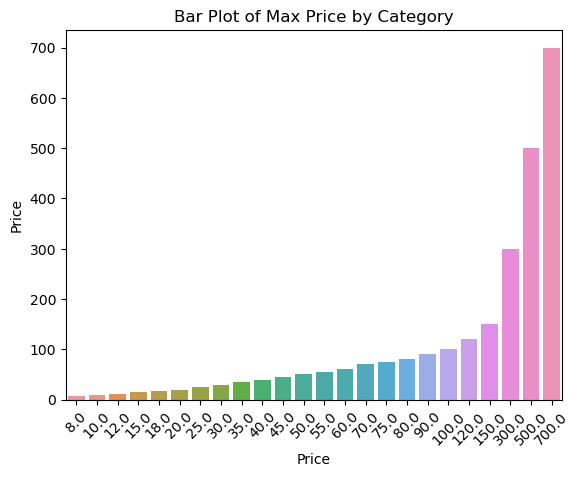

In [50]:
#Bar Plot: Mean 'Price' by 'Category'
sns.barplot(y= data['Price'], x=data['Price'], estimator = max)

plt.title('Bar Plot of Max Price by Category') #can change to max, min, mean, etc
plt.xticks(rotation=45)
plt.show()

##### Q3. Create a scatter plot to analyze the relationship between ShippingTime and CustomerSatisfaction. Do you notice any trends or patterns in how shipping time affects customer satisfaction?

Text(0.5, 1.0, 'Scatterplot of Shipping Time vs. Customer Satisfaction')

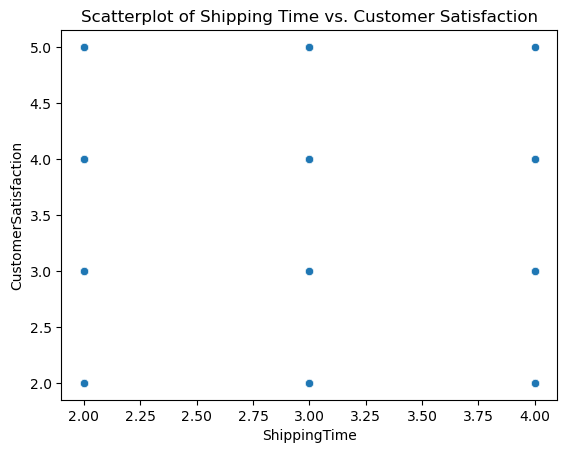

In [57]:
sns.scatterplot(x=data['ShippingTime'],y=data['CustomerSatisfaction'])
plt.title("Scatterplot of Shipping Time vs. Customer Satisfaction")

In [56]:
# No correlation

### e. Pair Plot:

- Purpose: Plot pairwise relationships across a dataset.
- When to Use: When you want to explore relationships between multiple numerical variables in a dataset.


C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


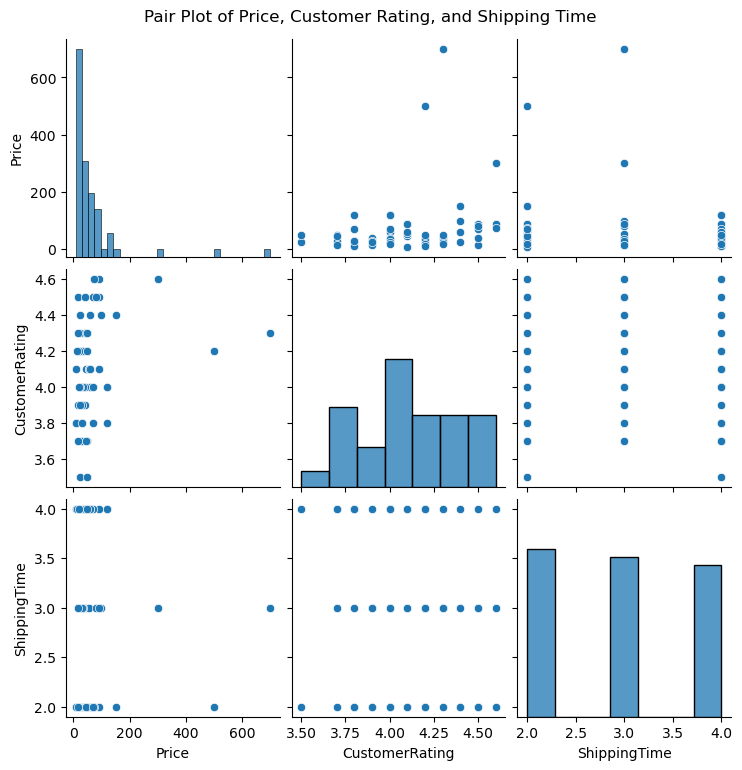

In [51]:
# Pair Plot: Relationships between 'Price', 'CustomerRating', and 'ShippingTime'
sns.pairplot(data[['Price', 'CustomerRating', 'ShippingTime']])
plt.suptitle('Pair Plot of Price, Customer Rating, and Shipping Time', y=1.02)
plt.show()


### f. Heatmap:
- Purpose: Show correlations between numerical variables using color gradients.
- When to Use: Best used to visualize the strength of relationships between variables in a correlation matrix.

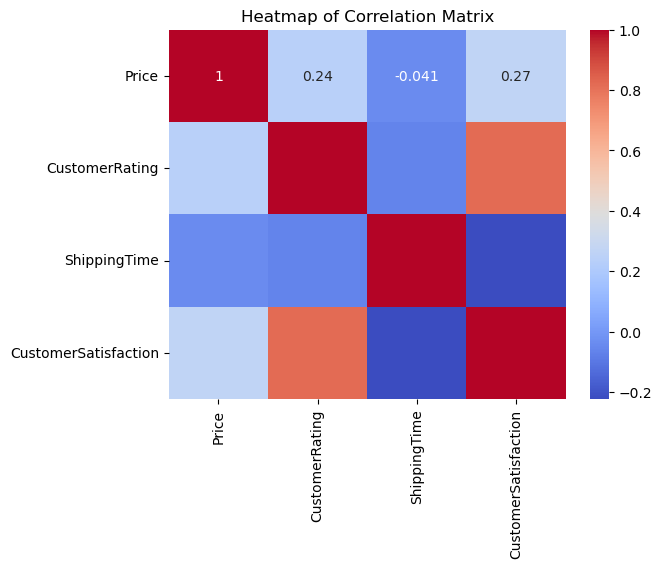

In [55]:
# Heatmap: Correlation matrix of numerical variables
correlation_matrix = data[['Price', 'CustomerRating', 'ShippingTime', 'CustomerSatisfaction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

##### Q4. Generate a pair plot for the variables Price, CustomerRating, and CustomerSatisfaction. What insights can you gather from the pairwise relationships between these variables?

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


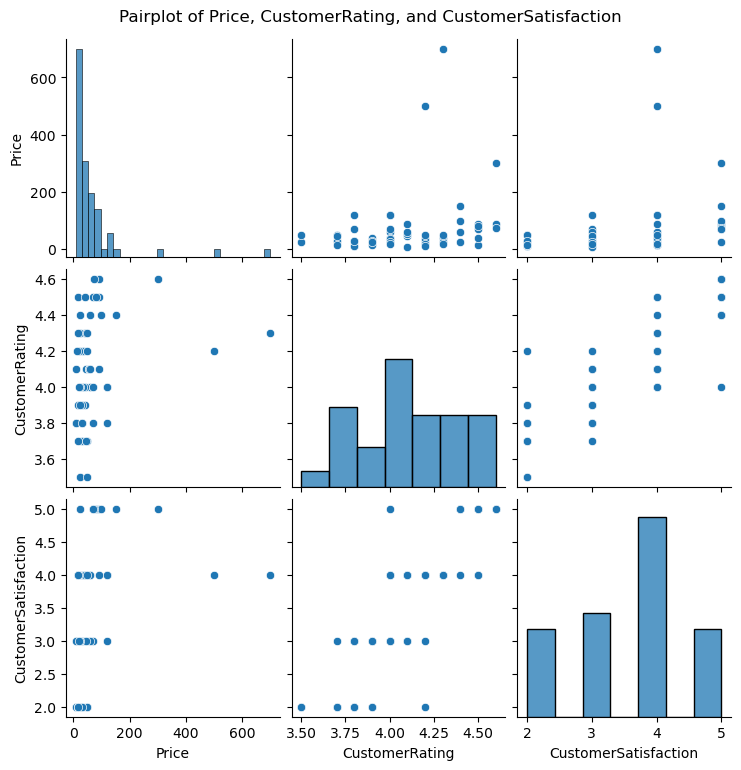

In [54]:
sns.pairplot(data[['Price', 'CustomerRating','CustomerSatisfaction']])
plt.suptitle("Pairplot of Price, CustomerRating, and CustomerSatisfaction", y=1.02)
plt.show()